In [4]:
import scanpy as sc
import numpy as np
import pandas as pd

In [5]:
DATASET_DIR = "../dataset"
RESULT_DIR = "../results"
DATASET_NAMES = ["PBMC1", "PBMC2", "PBMC3", "PBMC4"]

In [ ]:
# read 10x data
dataset_10x_dir = DATASET_DIR + "/" + "PBMC1" + "-Filtered/10x"
ge = sc.read_10x_mtx(dataset_10x_dir, var_names="gene_symbols", cache=False)

array([[<Axes: title={'center': 'count'}>]], dtype=object)

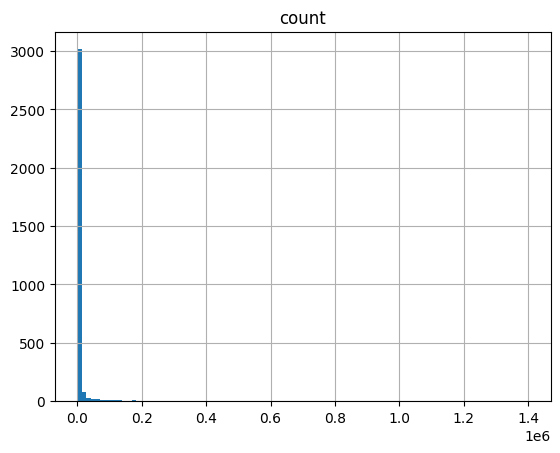

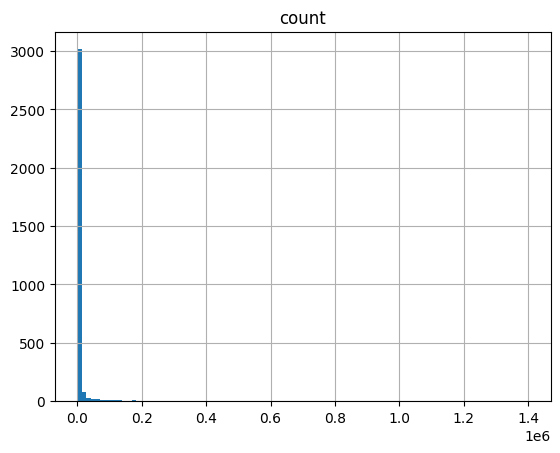

In [35]:
# sum number of cells per gene
gene_expr_count = pd.DataFrame({"count": np.array(ge.X.sum(axis=0)).reshape(-1)}, index=ge.var_names)
# read COTAN markers
markers_dir = RESULT_DIR + "/" + 'PBMC1' + "/COTAN"
cotan_markers_df = pd.read_csv(markers_dir + "/markers.csv")
cotan_markers = cotan_markers_df["gene"].unique()
# intersect with count matrix
cotan_markers_count = gene_expr_count.loc[cotan_markers]
# read Seurat markers
markers_dir = RESULT_DIR + "/" + 'PBMC1' + "/Seurat"
seurat_markers_df = pd.read_csv(markers_dir + "/markers.csv")
seurat_markers = seurat_markers_df["gene"].unique()
# intersect with count matrix
seurat_markers_count = gene_expr_count.loc[seurat_markers]

# plot histogram of counts
cotan_markers_count.hist(bins=100)
seurat_markers_count.hist(bins=100)

In [6]:
for dataset in DATASET_NAMES:
    # read 10x data
    dataset_10x_dir = DATASET_DIR + "/" + dataset + "-Filtered/10x"
    ge = sc.read_10x_mtx(dataset_10x_dir, var_names="gene_symbols", cache=False)
    # sum number of cells per gene
    gene_expr_count = pd.DataFrame(ge.X.sum(axis=0), index=ge.var_names, columns=["count"])
    # normalize counts
    gene_expr_count["count"] = gene_expr_count["count"] / ge.shape[0]
    # read COTAN markers
    markers_dir = RESULT_DIR + "/" + dataset + "/COTAN"
    cotan_markers_df = pd.read_csv(markers_dir + "/markers.csv")
    cotan_markers = cotan_markers_df["gene"].unique()
    # intersect with count matrix
    cotan_markers_count = gene_expr_count.loc[cotan_markers]
    # read Seurat markers
    markers_dir = RESULT_DIR + "/" + dataset + "/Seurat"
    seurat_markers_df = pd.read_csv(markers_dir + "/markers.csv")
    seurat_markers = seurat_markers_df["gene"].unique()
    # intersect with count matrix
    seurat_markers_count = gene_expr_count.loc[seurat_markers]

    # sort by count in descending order
    cotan_markers_count = cotan_markers_count.sort_values(by="count", ascending=False)
    seurat_markers_count = seurat_markers_count.sort_values(by="count", ascending=False)

    # plot histogram of counts
    cotan_markers_count.hist(bins=100)
    seurat_markers_count.hist(bins=100)

ValueError: Shape of passed values is (1, 14088), indices imply (14088, 1)